## 1. Import core library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Import sklearn modules

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 2. Load iris dataset

In [4]:
iris = load_iris()
X =iris.data
y = iris.target

In [5]:
# convert to Dataframe for readability
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = y
df.head


<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

### 3. Feature scaling

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Apply K-Means clustering

In [7]:
kmeans = KMeans(n_clusters = 3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
# cluster labels
cluster_labels = kmeans.labels_

In [8]:
# view the cluster labels
kmeans.labels_

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### 5. Add Cluster Labels to DataFrame

In [8]:
df['cluster'] = cluster_labels

In [9]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

### 6. Calculate WCSS and Silhouette Score

In [10]:
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette score:", sil_score)
wcss = kmeans.inertia_
print("WCSS:", wcss)

Silhouette score: 0.4798814508199817
WCSS: 191.02473685317972


### 7. Visualize Clustering (2D projection)

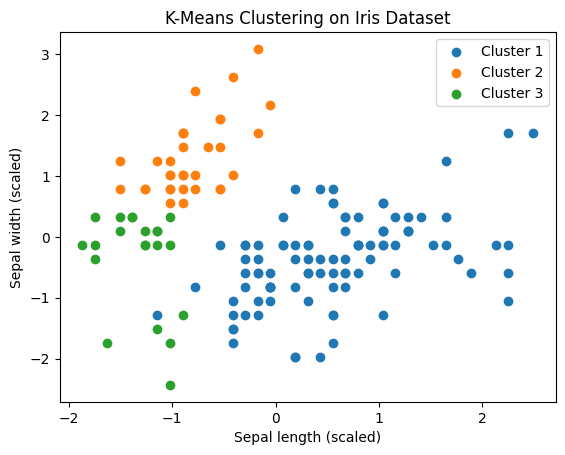

In [11]:
# Plot each cluster separately
for cluster_id in np.unique(cluster_labels):
    plt.scatter(
        X_scaled[cluster_labels == cluster_id, 0],
        X_scaled[cluster_labels == cluster_id, 1],
        label=f"Cluster {cluster_id + 1}"
    )

plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.title("K-Means Clustering on Iris Dataset")

plt.legend()
plt.show()

### 8. Elbow Method

In [12]:
inertia_values = []

In [13]:
for k in range(1,10):
    km = KMeans(n_clusters = k,random_state=42,n_init=10)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

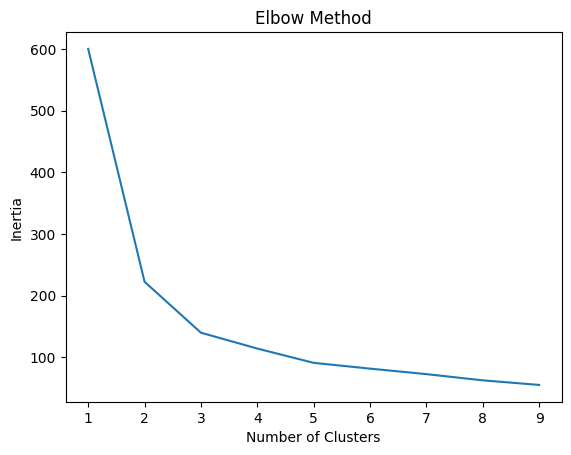

In [14]:
plt.figure()
plt.plot(range(1,10), inertia_values)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()